In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")
matplotlib.rcParams['figure.figsize'] = (10, 5)

In [2]:
train = pd.read_csv("../data/application_train.csv")

In [60]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [62]:
len(train.columns)

122

Text(0.5, 0, 'Gender')

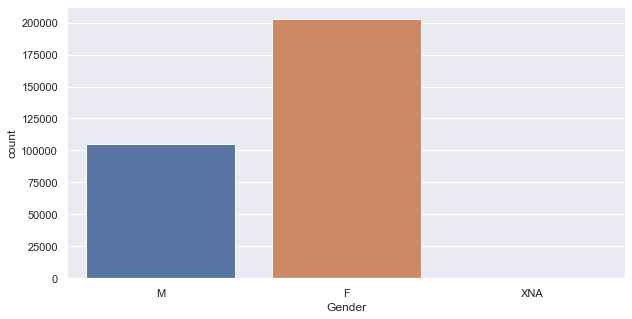

In [63]:
## Analyse basic parameters
## gender
sns.countplot(x="CODE_GENDER", data=train)
plt.xlabel("Gender")

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

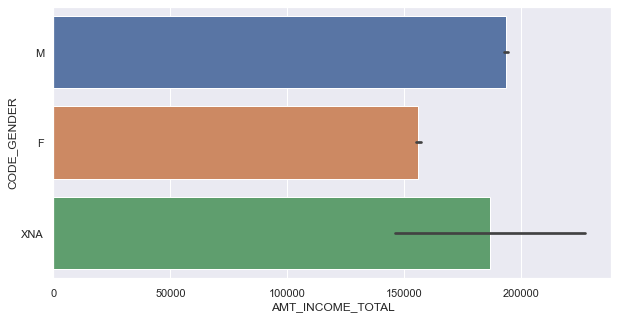

In [64]:
## annual income by gender
sns.barplot(x="AMT_INCOME_TOTAL", y="CODE_GENDER", data=train)
plt.ylabel

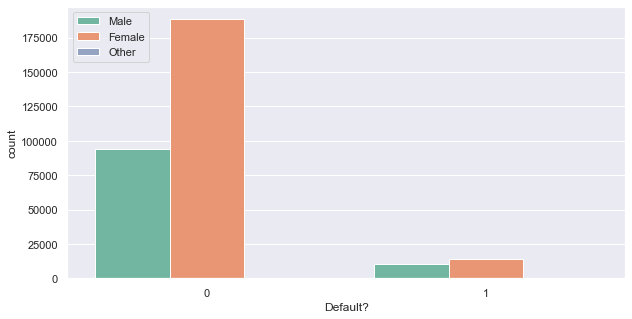

In [65]:
## Default rate by gender
sns.countplot(x="TARGET", hue="CODE_GENDER", data=train, palette="Set2")
plt.xlabel("Default?")
plt.legend(["Male", "Female", "Other"])

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='OWN_CAR_AGE', ylabel='Density'>

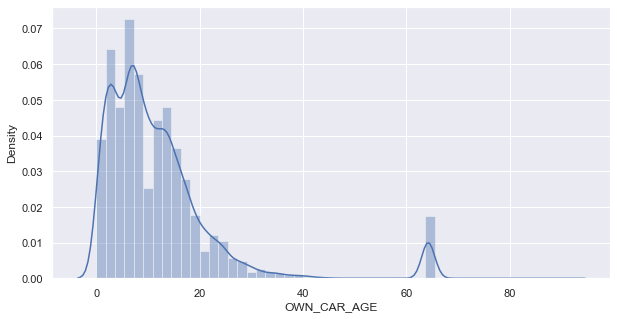

In [66]:
## distribution of car age
sns.distplot(train["OWN_CAR_AGE"].dropna(), norm_hist=False, kde=True)


Text(0, 0.5, 'Number of children')

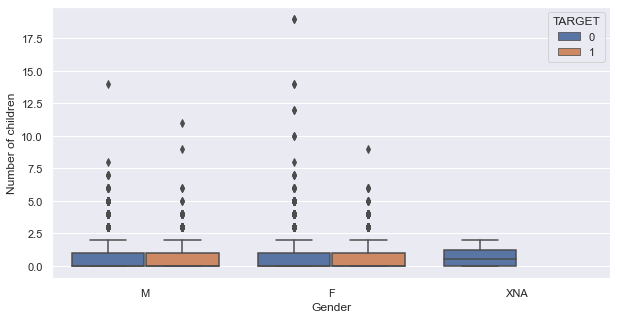

In [67]:
## number of children 
sns.boxplot(x='CODE_GENDER',y='CNT_CHILDREN',hue='TARGET',data=train)
plt.xlabel("Gender")
plt.ylabel("Number of children")

Text(0.5, 0, 'Default?')

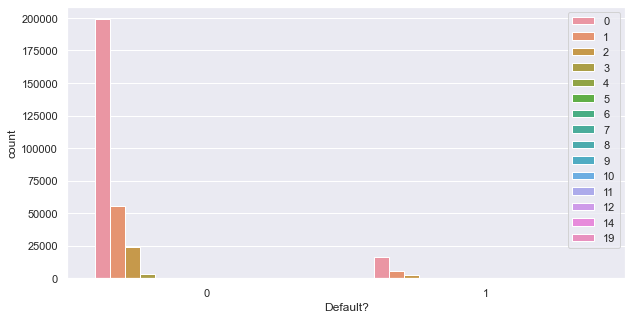

In [68]:
## influence of number of children on repayment
sns.countplot(x="TARGET", hue="CNT_CHILDREN", data=train)
plt.legend(loc=1)
plt.xlabel("Default?")

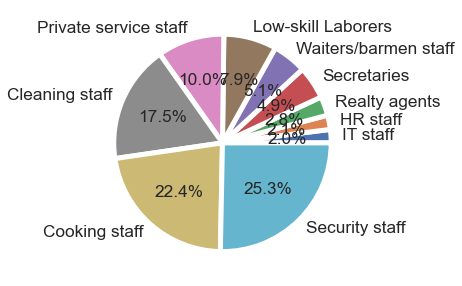

In [69]:
## distribution of occupation type
# sns.countplot(x='OCCUPATION_TYPE',data=train)
# plt.xlabel("Occupation Type")
# plt.xticks(rotation=70);

occupation_count = train.groupby(["OCCUPATION_TYPE"]).size().to_dict()
occupation_count_sorted = sorted(occupation_count.items(), key=lambda x: x[1])
occupation_count = dict(occupation_count_sorted[:10])
plt.pie(
    list(occupation_count.values()),
    labels=occupation_count.keys(),
    autopct="%.1f%%",
    wedgeprops={"linewidth": 5, "edgecolor": "white"},
    textprops={"size": "x-large"},
)

plt.show()


Text(0, 0.5, 'Average Annual family income')

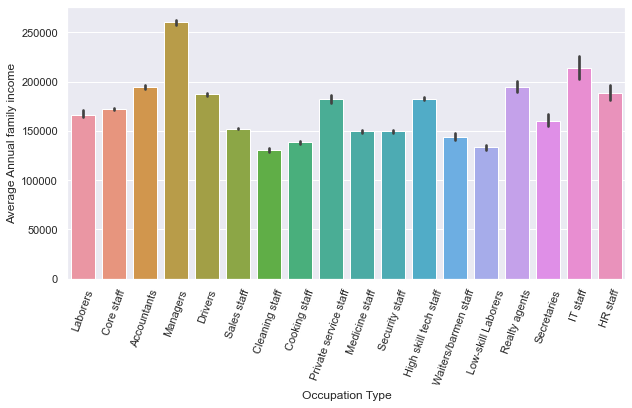

In [70]:
## occupation type with income relationship
sns.barplot(x="OCCUPATION_TYPE", y="AMT_INCOME_TOTAL", data=train)
plt.xticks(rotation=70)
plt.xlabel("Occupation Type")
plt.ylabel("Average Annual family income")


Text(0.5, 0, 'Occupation Type')

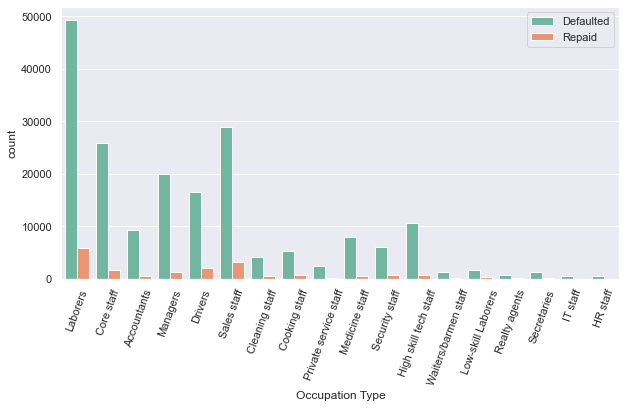

In [71]:
## relationship between occupation type and repayment ability
sns.countplot(x="OCCUPATION_TYPE", hue="TARGET", data=train, palette="Set2")
plt.legend(["Defaulted", "Repaid"])
plt.xticks(rotation=70)
plt.xlabel("Occupation Type")
